In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip install Thermobar

## Importing LEPR data from Keith's barometry calibrations
- Amp compositions stored in LEPR_Amp
- Cpx compositions stored in Cpx_Amp, have already taken out those with Ca_CaMgFe<0.05 (e.g. Opxs that have snuck into LEPR)

In [3]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('Putirka_Amp_Cali.xlsx', sheet_name="Sheet1")
    LEPR_Amp=LEPR_Amp_in['Amps']
    
    LEPR_Cpx_in=pt.import_excel('Putirka_Cpx_Cali.xlsx', sheet_name="Sheet1")
    LEPR_px_input=LEPR_Cpx_in['my_input'].iloc[:1259]
    LEPR_px=LEPR_Cpx_in['Cpxs'].iloc[:1259]
    
    
    Cpx_Comps=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_px)
    Total=LEPR_px.sum(axis=1)-LEPR_px.index


In [4]:
    LEPR_Cpx=LEPR_px.loc[(Cpx_Comps['Ca_CaMgFe']>0.2) & (Total>95) & (Total<105)]
    LEPR_Cpx_input=LEPR_px_input.loc[(Cpx_Comps['Ca_CaMgFe']>0.2) &  (Total>95) & (Total<105)]
    len_cpx=len(LEPR_Cpx)

In [5]:
LEPR_Opx_in=pd.read_excel('Putirka_Opx_Cali.xlsx', sheet_name="Sheet1")
# Keiths spreadsheet, doesnt have oxides, only cat ractions

### This cell swaps Cpx headings in the columns to read "amp" so that I can enter the cpx compositions into the amphibole recalcuation functions (e.g., saying imagine we had thought these cpxs were amps, does the Leake site allocation help us)

In [6]:
LEPR_Cpx_Amp_Headings=LEPR_Cpx.copy()
LEPR_Cpx_Amp_Headings.columns = [col.replace('_Cpx', '_Amp') for col in LEPR_Cpx.columns]

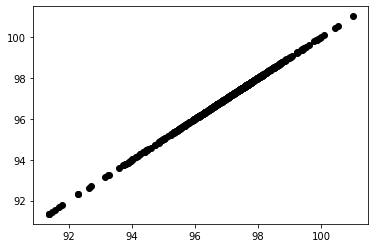

In [7]:
plt.plot(LEPR_Amp.sum(axis=1)-LEPR_Amp.index, LEPR_Amp.sum(axis=1)-LEPR_Amp.index, 'ok')

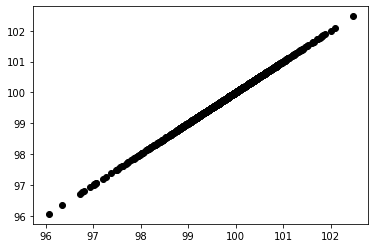

In [8]:
plt.plot(LEPR_Cpx.sum(axis=1)-LEPR_Cpx.index, LEPR_Cpx.sum(axis=1)-LEPR_Cpx.index, 'ok')

In [9]:
## Duplicating Cpx dataframe, removing Cpx column heading so I can stitch Cpx and amp together
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]

## Duplicating Amp dataframe, removing Amp column heading so I can stitch Cpx and amp together
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]

# Dropping F and Cl data - wouldnt be far to train algorithm using this as it would learn that anything with Cl and F
# is an apmhibole!
LEPR_Amp_nosuf.drop(columns=['F', 'Cl'], inplace=True)

# Combining Cpx and Amp into a single dataframe for clustering/machine learning
Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Amp_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)


X=Combo.values
lencpx=len(LEPR_Cpx)

# Adding suffix "Amp" to entire dataframe, and same for Cpx so can put it into Thermobar amp and cpx functions
Combo_Amp_Suffix=Combo.copy()
Combo_Cpx_Suffix=Combo.copy()
Combo_Amp_Suffix=Combo.add_suffix('_Amp')
Combo_Cpx_Suffix=Combo.add_suffix('_Cpx')


All_23ox=pt.calculate_23oxygens_amphibole(amp_comps=Combo_Amp_Suffix)
All_6ox=pt.calculate_clinopyroxene_components(cpx_comps=Combo_Cpx_Suffix)

Cpx_23ox=All_23ox.iloc[:len_cpx]
Amp_23ox=All_23ox.iloc[len_cpx:]

Cpx_6ox=All_6ox.iloc[:len_cpx]
Amp_6ox=All_6ox.iloc[len_cpx:]

Cpx_Filter=Cpx_6ox['Cation_Sum_Cpx'].between(3.98, 4.05)
Amp_Filter=Amp_23ox['cation_sum_All'].between(15.4, 16)

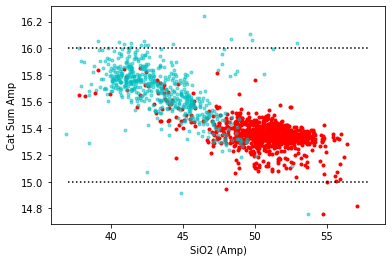

In [10]:
plt.plot(Cpx_6ox['SiO2_Cpx'],Cpx_23ox['cation_sum_All'], '.r')
plt.xlabel('SiO2 (Cpx)')
plt.ylabel('Cat Sum')

plt.plot(Amp_6ox['SiO2_Cpx'],Amp_23ox['cation_sum_All'], '.c', alpha=0.5)
plt.xlabel('SiO2 (Amp)')
plt.ylabel('Cat Sum Amp')

plt.plot([37, 58], [15, 15], ':k')
plt.plot([37, 58], [16, 16], ':k')

Text(0, 0.5, 'Cat Sum Cpx')

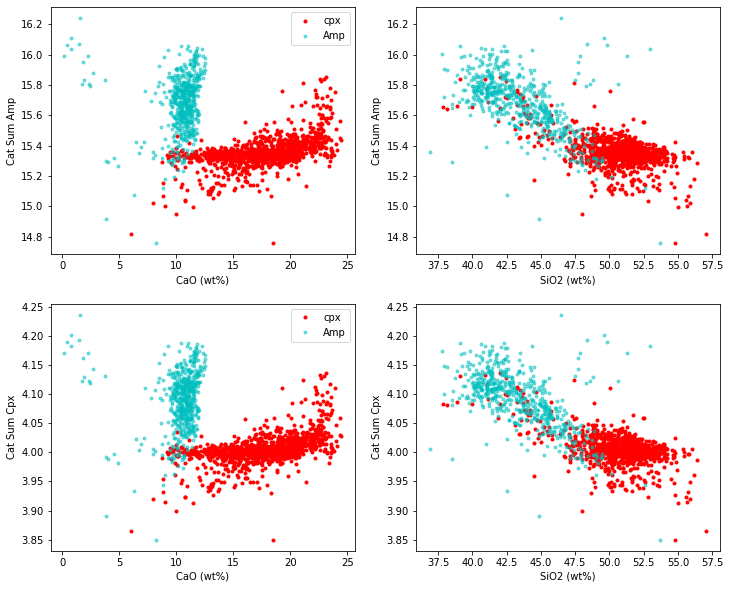

In [11]:
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(Cpx_6ox['CaO_Cpx'],Cpx_23ox['cation_sum_All'], '.r', label='cpx')
ax0.plot(Amp_6ox['CaO_Cpx'],Amp_23ox['cation_sum_All'], '.c', alpha=0.5, label='Amp')
ax0.set_xlabel('CaO (wt%)')
ax0.set_ylabel('Cat Sum Amp')
ax0.legend()

ax1.plot(Cpx_6ox['SiO2_Cpx'],Cpx_23ox['cation_sum_All'], '.r', label='cpx')
ax1.plot(Amp_6ox['SiO2_Cpx'],Amp_23ox['cation_sum_All'], '.c', alpha=0.5, label='Amp')
ax1.set_xlabel('SiO2 (wt%)')
ax1.set_ylabel('Cat Sum Amp')

ax3.plot(Cpx_6ox['CaO_Cpx'],Cpx_6ox['Cation_Sum_Cpx'], '.r', label='cpx')
ax3.plot(Amp_6ox['CaO_Cpx'],Amp_6ox['Cation_Sum_Cpx'], '.c', alpha=0.5, label='Amp')
ax3.set_xlabel('CaO (wt%)')
ax3.set_ylabel('Cat Sum Cpx')
ax3.legend()

ax4.plot(Cpx_6ox['SiO2_Cpx'],Cpx_6ox['Cation_Sum_Cpx'], '.r', label='cpx')
ax4.plot(Amp_6ox['SiO2_Cpx'],Amp_6ox['Cation_Sum_Cpx'], '.c', alpha=0.5, label='Amp')
ax4.set_xlabel('SiO2 (wt%)')
ax4.set_ylabel('Cat Sum Cpx')

# plt.plot([37, 58], [15, 15], ':k')
# plt.plot([37, 58], [16, 16], ':k')

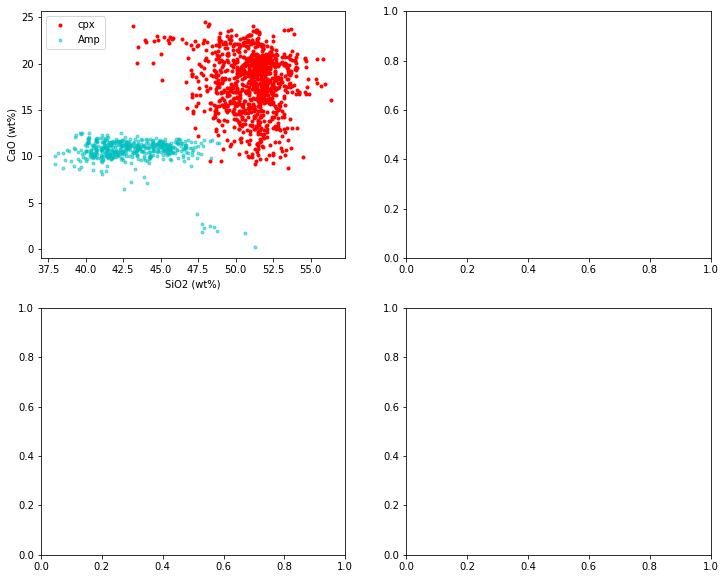

In [12]:
Cpx_Filter=Cpx_6ox['Cation_Sum_Cpx'].between(3.98, 4.05)
Amp_Filter=Amp_23ox['cation_sum_All'].between(15.4, 16)
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(Cpx_6ox['SiO2_Cpx'].loc[Cpx_Filter],Cpx_6ox['CaO_Cpx'].loc[Cpx_Filter], '.r', label='cpx')
ax0.plot(Amp_6ox['SiO2_Cpx'].loc[Amp_Filter],Amp_6ox['CaO_Cpx'].loc[Amp_Filter], '.c', alpha=0.5, label='Amp')
ax0.set_ylabel('CaO (wt%)')
ax0.set_xlabel('SiO2 (wt%)')
ax0.legend()

#
# plt.plot([37, 58], [16, 16], ':k')

(0.0, 0.3)

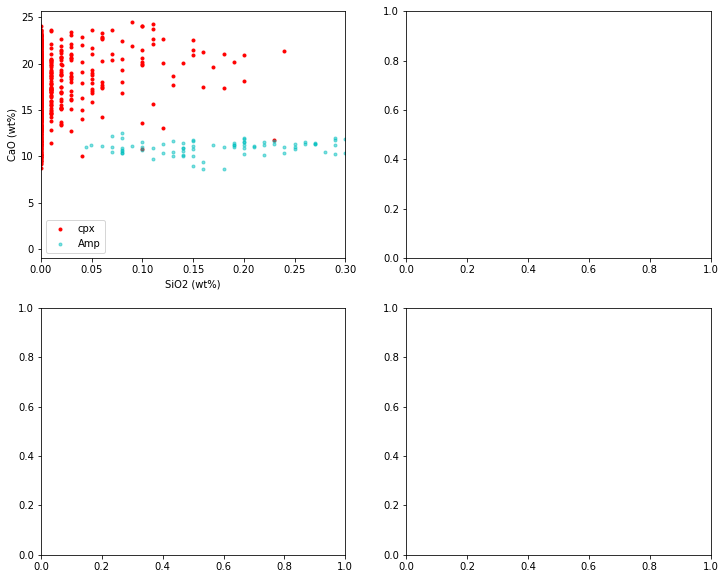

In [13]:

fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(Cpx_6ox['K2O_Cpx'].loc[Cpx_Filter],Cpx_6ox['CaO_Cpx'].loc[Cpx_Filter], '.r', label='cpx')
ax0.plot(Amp_6ox['K2O_Cpx'].loc[Amp_Filter],Amp_6ox['CaO_Cpx'].loc[Amp_Filter], '.c', alpha=0.5, label='Amp')
ax0.set_ylabel('CaO (wt%)')
ax0.set_xlabel('SiO2 (wt%)')
ax0.legend()
ax0.set_xlim([0, 0.3])

#
# plt.plot([37, 58], [16, 16], ':k')

In [14]:
cat_sum=All_6ox['Cation_Sum_Cpx'].between(3.95, 4.05)

Text(0, 0.5, 'Cat Sum')

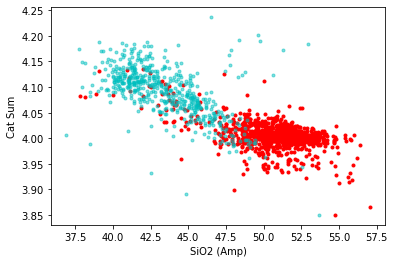

In [15]:
plt.plot(Cpx_6ox['SiO2_Cpx'],Cpx_6ox['Cation_Sum_Cpx'], '.r')
plt.xlabel('SiO2 (Cpx)')
plt.ylabel('Cat Sum')

plt.plot(Amp_6ox['SiO2_Cpx'],Amp_6ox['Cation_Sum_Cpx'], '.c', alpha=0.5)
plt.xlabel('SiO2 (Amp)')
plt.ylabel('Cat Sum')

In [16]:
All_23ox['cation_sum_All']

0       15.384760
1       15.361128
2       15.390959
3       15.382732
4       15.307265
          ...    
1699    15.605387
1700    15.638322
1701    15.479654
1702    15.547410
1703    15.613088
Name: cation_sum_All, Length: 1704, dtype: float64

Text(0, 0.5, 'cation sum Cpx')

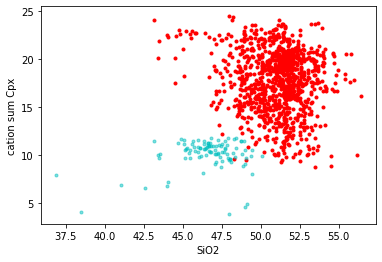

In [17]:
All_6ox['Cation_Sum_Cpx']
plt.plot(Cpx_6ox['SiO2_Cpx'].loc[cat_sum],Cpx_6ox['CaO_Cpx'].loc[cat_sum], '.r', label='Cpx')
plt.plot(Amp_6ox['SiO2_Cpx'].loc[cat_sum], Amp_6ox['CaO_Cpx'].loc[cat_sum], '.c', label='Amp', alpha=0.5)
plt.xlabel('SiO2')
plt.ylabel('cation sum Cpx')

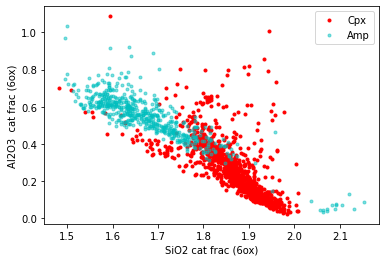

In [18]:

plt.plot(Cpx_6ox['SiO2_Cpx_cat_6ox'],Cpx_6ox['Al2O3_Cpx_cat_6ox'], '.r', label='Cpx')
plt.plot(Amp_6ox['SiO2_Cpx_cat_6ox'], Amp_6ox['Al2O3_Cpx_cat_6ox'], '.c', label='Amp', alpha=0.5)
plt.xlabel('SiO2 cat frac (6ox)')
plt.ylabel('Al2O3  cat frac (6ox)')
plt.legend()

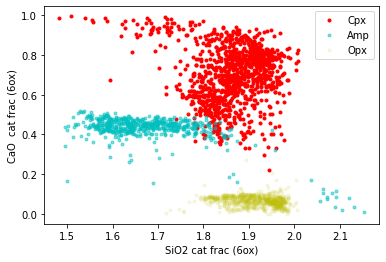

In [19]:

plt.plot(Cpx_6ox['SiO2_Cpx_cat_6ox'], Cpx_6ox['CaO_Cpx_cat_6ox'], '.r', label='Cpx')
plt.plot(Amp_6ox['SiO2_Cpx_cat_6ox'], Amp_6ox['CaO_Cpx_cat_6ox'], '.c', label='Amp', alpha=0.5)
plt.plot(LEPR_Opx_in['Si opx 6 ox'], LEPR_Opx_in['Ca opx 6 ox'], '.y',label='Opx', alpha=0.1)
plt.xlabel('SiO2 cat frac (6ox)')
plt.ylabel('CaO  cat frac (6ox)')
plt.legend()

## Plots showing overlap - actually better when use oxide, rather than cation fractions!

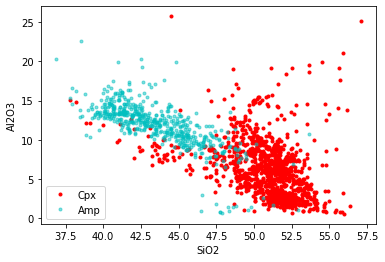

In [20]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['Al2O3_Cpx'], '.r', label='Cpx')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['Al2O3_Amp'], '.c', label='Amp', alpha=0.5)
plt.xlabel('SiO2')
plt.ylabel('Al2O3')
plt.legend()

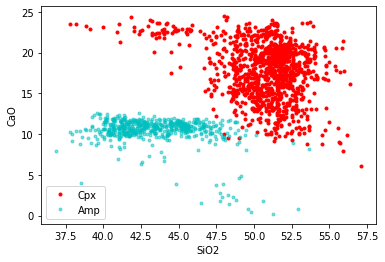

In [21]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r', label='Cpx')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.c', label='Amp', alpha=0.5)
plt.xlabel('SiO2')
plt.ylabel('CaO')
plt.legend()

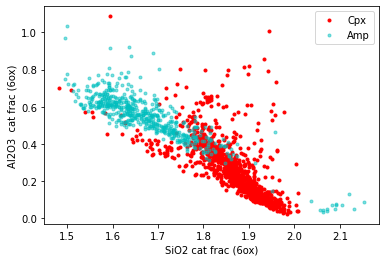

In [22]:

plt.plot(Cpx_6ox['SiO2_Cpx_cat_6ox'],Cpx_6ox['Al2O3_Cpx_cat_6ox'], '.r', label='Cpx')
plt.plot(Amp_6ox['SiO2_Cpx_cat_6ox'], Amp_6ox['Al2O3_Cpx_cat_6ox'], '.c', label='Amp', alpha=0.5)
plt.xlabel('SiO2 cat frac (6ox)')
plt.ylabel('Al2O3  cat frac (6ox)')
plt.legend()## Is the problem Opxs?

In [23]:
## Are Opxs and Pigeonites the problem/

## Clustering k means

In [24]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [25]:
scaler_sites = StandardScaler()
scaled_features_sites = scaler_sites.fit_transform(X)

kmeans_sites = KMeans(
init="random",
n_clusters=2,
 n_init=10,
max_iter=300,
random_state=42)

kmeans_sites.fit(scaled_features_sites)
Classification_kmeans=kmeans_sites.labels_

In [26]:
Classification_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
# Number of amps misclassified =4
display(sum(kmeans_sites.labels_[lencpx:]))
display(len(LEPR_Amp))

555

559

In [28]:
# Number of Cpx misclassified =78/1222
display(sum(kmeans_sites.labels_[:lencpx]))
display(len(LEPR_Cpx))

81

1145

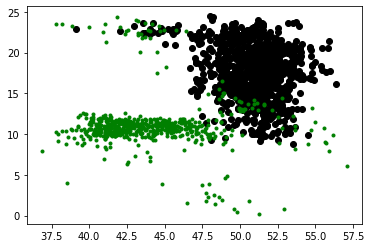

In [29]:
plt.plot(Combo['SiO2'].loc[Classification_kmeans==0], 
         Combo['CaO'].loc[Classification_kmeans==0], 'ok')

plt.plot(Combo['SiO2'].loc[Classification_kmeans==1], 
         Combo['CaO'].loc[Classification_kmeans==1], '.g')

## Aglomerative Clustering

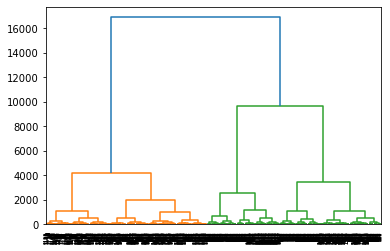

In [30]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [31]:
model_agl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_agl.fit(X)
labels = model_agl.labels_

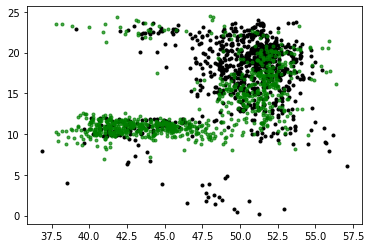

In [32]:
plt.plot(Combo['SiO2'].loc[labels==0], 
         Combo['CaO'].loc[labels==0], '.k')

plt.plot(Combo['SiO2'].loc[labels==1], 
         Combo['CaO'].loc[labels==1], '.g', alpha=0.7)



In [33]:
print('Amps in cluster 0')
display(sum(kmeans_sites.labels_[lencpx:]==0))
display(len(LEPR_Amp))
print('Amps in cluster 1')
display(sum(kmeans_sites.labels_[lencpx:]==1))
display(len(LEPR_Amp))
print('Amps in cluster 2')
display(sum(kmeans_sites.labels_[lencpx:]==2))
display(len(LEPR_Amp))

Amps in cluster 0


4

559

Amps in cluster 1


555

559

Amps in cluster 2


0

559

In [34]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

NameError: name 'Cpx_true_23ox' is not defined

In [ ]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['CaO_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['CaO_Amp_cat_23ox'], '.b', alpha=0.5)

In [ ]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox']+Cpx_true_23ox['TiO2_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox']+Amp_true_23ox['TiO2_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

In [ ]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox']+Cpx_true_23ox['TiO2_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox']+Amp_true_23ox['TiO2_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

In [ ]:
sites_cpx_true.head()

In [ ]:
plt.plot(sites_amp_true['Si_T'],
        sites_amp_true['Ca_B'], 'ok')

plt.plot(sites_cpx_true['Si_T'],
        sites_cpx_true['Ca_B'], '.r', alpha=0.5)

Overlaps_CaSpace=sites_cpx_true['Ca_B']<1.9

plt.plot(sites_cpx_true['Si_T'].loc[Overlaps_CaSpace],
        sites_cpx_true['Ca_B'].loc[Overlaps_CaSpace], '.y', alpha=0.5)

plt.xlabel('Si_T site (Leake)')
plt.ylabel('Ca_B site (Leake)')

In [ ]:
plt.plot(sites_amp_true['Ca_B']/sites_amp_true['Si_T'],
         sites_amp_true['Na_A'], 'ok')

plt.plot(sites_cpx_true['Ca_B']/sites_cpx_true['Si_T'],
         sites_cpx_true['Na_A'],'.r', alpha=0.5)

plt.plot(sites_cpx_true['Ca_B'].loc[Overlaps_CaSpace]/sites_cpx_true['Si_T'].loc[Overlaps_CaSpace],
         sites_cpx_true['Na_A'].loc[Overlaps_CaSpace],'.y', alpha=0.5)
#plt.plot(sites_cpx_true['Al_T'].loc[Overlaps_CaSpace],
        #sites_cpx_true['Si_T'].loc[Overlaps_CaSpace], '.y', alpha=0.5)
plt.xlabel('Al_T site (Leake)')
plt.ylabel('Ca_B site (Leake)')
#plt.ylim([1.5, 2.2])

In [ ]:
plt.plot(sites_amp_true['Al_T'],
        sites_amp_true['Na_A']+sites_amp_true['K_A']+sites_amp_true['Ca_B'], 'ok')

plt.plot(sites_cpx_true['Al_T'],
        sites_cpx_true['Na_A']+sites_cpx_true['K_A']+sites_cpx_true['Ca_B'], '.g')

# K means splitting of cpx and Amp LEPR data

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

kmeans = KMeans(
init="random",
n_clusters=2,
 n_init=10,
max_iter=300,
random_state=42)

kmeans.fit(scaled_features)

In [ ]:
kmeans.labels_

In [ ]:
# Number of amps misclassified =1
display(sum(kmeans.labels_[lencpx:]))
display(len(LEPR_Amp))

In [ ]:
# Number of amps misclassified =93/1222
display(sum(kmeans.labels_[:lencpx]))
display(len(LEPR_Cpx))

In [ ]:
# Finding LEPR ones that are misclassified
Combo_cpx_real=Combo.iloc[0:lencpx]
Combo_amp_real=Combo.iloc[lencpx:]
Combo_clust0_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==0]
Combo_clust1_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==1]
Combo_clust2_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==2]

In [ ]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Na2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Na2O'], '.b')

In [ ]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Al2O3'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Al2O3'], '.b')

In [ ]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

## Titanium sites vs. A sites

In [ ]:

plt.plot(Combo_cpx_real['SiO2']+Combo_cpx_real['Al2O3']+Combo_cpx_real['TiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2']+Combo_amp_real['Al2O3']+Combo_amp_real['TiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

In [ ]:

plt.plot(Combo_cpx_real['SiO2']+Combo_cpx_real['Al2O3']+Combo_cpx_real['TiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2']+Combo_amp_real['Al2O3']+Combo_amp_real['TiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

In [ ]:

plt.plot(Combo_cpx_real['CaO']+Combo_cpx_real['FeOt'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['CaO']+Combo_amp_real['FeOt'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')
plt.xlim([0, 50])

In [ ]:
plt.plot(Combo_clust0_cpx['CaO'], Combo_clust0_cpx['Na2O'], '.r')

plt.plot(Combo_amp_real['CaO'], Combo_amp_real['Na2O'], '.b')
plt.plot(Combo_clust1_cpx['CaO'], Combo_clust1_cpx['Na2O'], '.g')
plt.plot(Combo_clust2_cpx['CaO'], Combo_clust2_cpx['Na2O'], '.c')


In [ ]:
plt.plot(Combo['CaO'].iloc[0:1260], Combo['Na2O'].iloc[0:1260], 'ok')
plt.plot(Combo['CaO'].iloc[1260:], Combo['Na2O'].iloc[1260:], '.r')

In [ ]:

from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9, random_state=10)
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

# create scatter plot for samples from each cluster


In [35]:
import Thermobar as pt

In [36]:
## No amphiboles yet. 
Baker_read_Cpx=pt.import_excel('Baker.xlsx', sheet_name='Cpx_All')
Baker_Input_Cpx=Baker_read_Cpx['my_input']
Baker_Cpx=Baker_read_Cpx['Cpxs']
Baker_Cpx_copy=Baker_Cpx.copy()

## No amphiboles yet. 
Baker_read_Opx=pt.import_excel('Baker.xlsx', sheet_name='Opx_All')
Baker_Input_Opx=Baker_read_Opx['my_input']
Baker_Opx=Baker_read_Opx['Opxs']
Baker_Opx_copy=Baker_Opx.copy()

## No amphiboles yet. 
Baker_read_Plag=pt.import_excel('Baker.xlsx', sheet_name='Plag_All')
Baker_Input_Plag=Baker_read_Plag['my_input']
Baker_Plag=Baker_read_Plag['Plags']
Baker_Plag_copy=Baker_Plag.copy()

In [37]:
## No amphiboles yet. 
Adams_read_Cpx=pt.import_excel('Adams.xlsx', sheet_name='Cpx_All')
Adams_Input_Cpx=Adams_read_Cpx['my_input']
Adams_Cpx=Adams_read_Cpx['Cpxs']
Adams_Cpx_copy=Adams_Cpx.copy()

## No amphiboles yet. 
Adams_read_Opx=pt.import_excel('Adams.xlsx', sheet_name='Opx_All')
Adams_Input_Opx=Adams_read_Opx['my_input']
Adams_Opx=Adams_read_Opx['Opxs']
Adams_Opx_copy=Adams_Opx.copy()

In [38]:
Rainier_read_Cpx=pt.import_excel('Rainier.xlsx', sheet_name='Cpx_All')
Rainier_Input_Cpx=Rainier_read_Cpx['my_input']
Rainier_Cpx=Rainier_read_Cpx['Cpxs']
Rainier_Cpx_copy=Rainier_Cpx.copy()

Rainier_read_Amp=pt.import_excel('Rainier.xlsx', sheet_name='Amp_All')
Rainier_Input_Amp=Rainier_read_Amp['my_input']
Rainier_Amp=Rainier_read_Amp['Amps']
Rainier_Amp_copy=Rainier_Amp.copy()

Rainier_read_Opx=pt.import_excel('Rainier.xlsx', sheet_name='Opx_All')
Rainier_Input_Opx=Rainier_read_Opx['my_input']
Rainier_Opx=Rainier_read_Opx['Opxs']
Rainier_Opx_copy=Rainier_Opx.copy()

In [39]:
Lassen_read_Cpx=pt.import_excel('Lassen.xlsx', sheet_name='Cpx_All')
Lassen_Input_Cpx=Lassen_read_Cpx['my_input']
Lassen_Cpx=Lassen_read_Cpx['Cpxs']
Lassen_Cpx_copy=Lassen_Cpx.copy()

Lassen_read_Amp=pt.import_excel('Lassen.xlsx', sheet_name='Amp_All')
Lassen_Input_Amp=Lassen_read_Amp['my_input']
Lassen_Amp=Lassen_read_Amp['Amps']
Lassen_Amp_copy=Lassen_Amp.copy()


In [40]:
Baker_Cpx

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.22,0.5007,3.5300,5.32,0.1401,16.67,21.67,0.2527,0.0,0.2984,TP3_cpx1-1
1,52.46,0.3527,2.5085,4.36,0.0958,16.78,22.28,0.2396,0.0,0.5776,TP3_cpx1-2
2,50.74,1.0913,2.0027,11.62,0.2940,15.05,18.08,0.3272,0.0,0.0136,TP3_cpx2
3,51.33,0.5243,2.5074,5.90,0.1708,16.07,21.20,0.2248,0.0,0.1629,TP4_cpx1-1
4,51.78,0.4274,1.7926,7.91,0.2242,15.45,21.04,0.3433,0.0,0.0228,TP4_cpx1-2
...,...,...,...,...,...,...,...,...,...,...,...
98,54.04,0.2990,0.8385,9.92,0.4618,13.92,20.55,0.3657,0.0,0.0000,BG-3TB CpxAc
99,53.05,0.4280,1.2284,10.05,0.3430,13.98,20.76,0.3613,0.0,0.0000,BG-3TB CpxBc
100,50.70,0.5747,1.6429,10.43,0.3332,13.86,19.63,0.3762,0.0,0.0035,BG-7TB CpxBc
101,52.76,0.4492,1.2692,9.29,0.4279,14.29,20.81,0.3729,0.0,0.0000,BG-7TB CpxCc


In [41]:
Cpx_combine=pd.concat([Rainier_Cpx, Baker_Cpx, Adams_Cpx, Lassen_Cpx], axis=0, ignore_index=True)
Opx_combine=pd.concat([Rainier_Opx, Baker_Opx, Adams_Opx], axis=0, ignore_index=True)
Plag_combine=pd.concat([Baker_Plag], axis=0, ignore_index=True)
Amp_combine=pd.concat([Rainier_Amp, Lassen_Amp], axis=0, ignore_index=True)

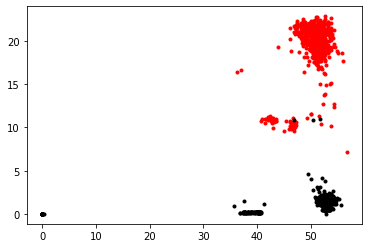

In [45]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.r')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['CaO_Opx'], '.k')

## LEPR plots

KeyError: 'SiO2_Opx'

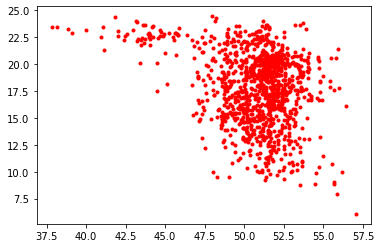

In [42]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Opx'], LEPR_Amp['CaO_Opx'], '.b')


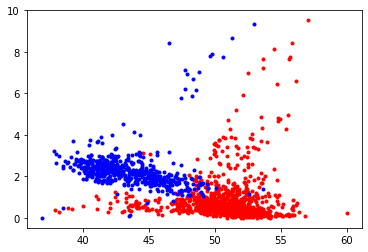

In [96]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['Na2O_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['Na2O_Amp'], '.b')


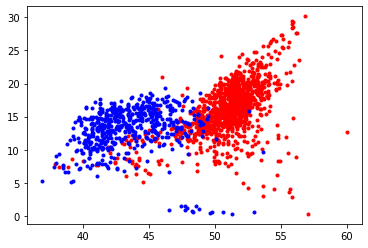

In [97]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['MgO_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['MgO_Amp'], '.b')


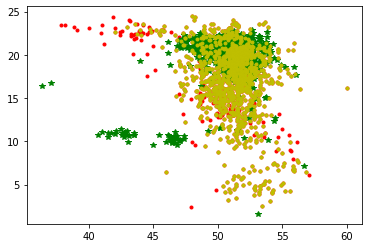

In [23]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '*g')
plt.plot(Combo_clust0_cpx['SiO2'], Combo_clust0_cpx['CaO'], '.y')


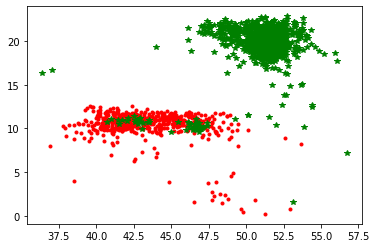

In [24]:
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.r')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '*g')
#plt.plot(Combo_clust0_cpx['SiO2'], Combo_clust0_cpx['CaO'], '.y')


In [25]:
findwronAmps=(Cpx_combine['SiO2_Cpx']<51) & (Cpx_combine['CaO_Cpx']<16)

In [26]:
Possible_Amps=Cpx_combine.loc[findwronAmps]
Possible_Amps

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
40,40.7000,5.2800,11.8500,12.6900,0.1715,11.9000,10.7700,3.4800,0.0,0.2834,PB5_cpx1
1048,46.8670,1.0600,9.1010,14.5340,0.4210,14.4590,9.5590,1.4710,0.0,0.0000,MAtephra16-5
1049,45.0030,0.9110,10.5810,14.8710,0.5480,13.4990,9.6010,1.7030,0.0,0.0130,MAtephra16-155
1050,46.7190,0.8230,9.4460,14.6380,0.3100,14.0210,9.8160,1.5450,0.0,0.0160,MAtephra16-123
1051,46.4310,0.9950,9.3240,14.6710,0.3610,14.4360,9.8530,1.5560,0.0,0.0000,MAtephra16-191
1052,45.9920,1.0310,9.5000,14.2710,0.3440,13.8090,9.8680,1.6570,0.0,0.0190,MAtephra16-51
1053,46.4420,1.0110,9.3730,14.0180,0.3710,14.5880,9.8920,1.5810,0.0,0.0000,MAtephra16-120
1054,43.0230,2.4500,12.3550,14.1390,0.2820,12.7430,9.9350,1.9210,0.0,0.0250,MAtephra16-85
1055,46.9750,1.0950,9.1420,13.9960,0.3330,14.4470,9.9900,1.5800,0.0,0.0000,MAtephra16-49
1056,47.0650,0.9550,9.1070,14.4010,0.3230,14.2800,10.0350,1.4350,0.0,0.0000,MAtephra16-93


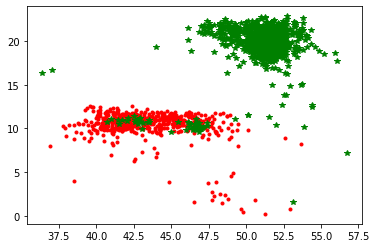

In [66]:
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.r')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '*g')


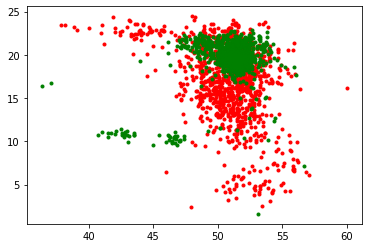

In [69]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.g')


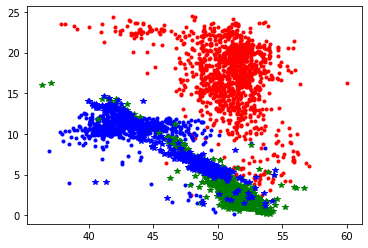

In [62]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.b')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], '*g')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], '*b')


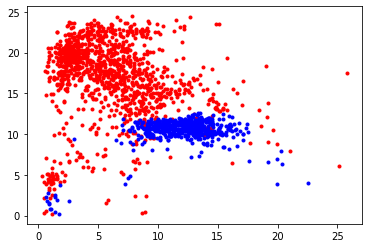

In [39]:
plt.plot(LEPR_Cpx['Al2O3_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['Al2O3_Amp'], LEPR_Amp['CaO_Amp'], '.b')


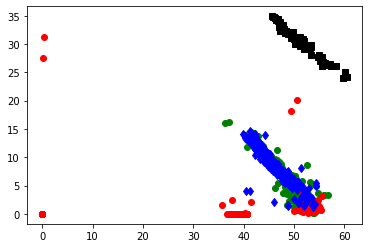

In [21]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], 'og')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Al2O3_Opx'], 'or')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Al2O3_Plag'], 'sk')

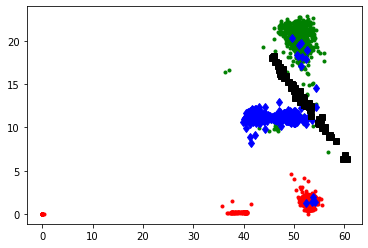

In [22]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['CaO_Opx'], '.r')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['CaO_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['CaO_Plag'], 'sk')

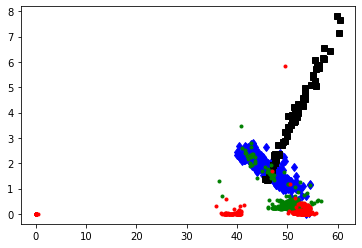

In [24]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Na2O_Plag'], 'sk')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Na2O_Opx'], '.r')


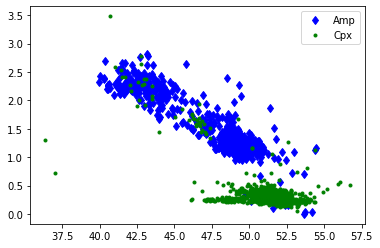

In [26]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g', label='Cpx')
plt.legend()


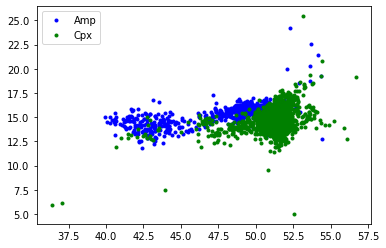

In [29]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()


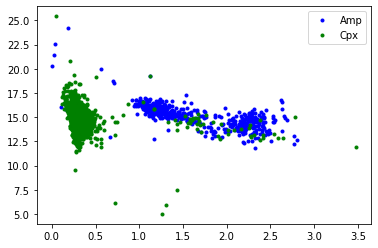

In [30]:
plt.plot(Amp_combine['Na2O_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['Na2O_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()
